In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [48]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 13 4MP/0 - 2020-02-07 12-07-01-027.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")

#cap = cv2.VideoCapture("C:/Users/shrin/Desktop/openpose-master/openpose-master/build/examples/tutorial_api_python/abhilash.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

5284.0

In [49]:
cap.set(cv2.CAP_PROP_POS_FRAMES,1500)

True

In [50]:
#%matplotlib notebook

(1080, 1920, 3)
(1080, 1920, 3)


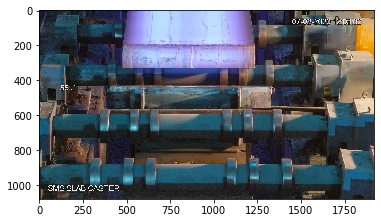

In [51]:
ret, frame = cap.read()
#imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
#resized = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#print(frame.shape)
#frame = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), cv2.INTER_AREA)
print(frame.shape)
plt.imshow(frame)

In [52]:
[179,771,1330,771]

[308,888,1455,888]
#%matplotlib notebook

[308, 888, 1455, 888]

In [53]:
#cv2.imwrite("toTatat1.jpg",frame)

In [54]:
#%matplotlib notebook

# pixels Per Metric

In [55]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
#alar = [257,647,1390,647]
#alar = [162,647,1548,647]
#alar = [325,1259,3111,1259] # 2x
#alar = [176,771,1330,771]
#alar = [313,888,1455 - 20,888]

alar = [313,888-100,1455 - 20,888-100]

#alar = [750,1259,2800,1259] # 2x

In [56]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


1.5062388591800355 <<<<<-----------------MM per Pix


(1080, 1920)
(1080, 1920) <- - dst


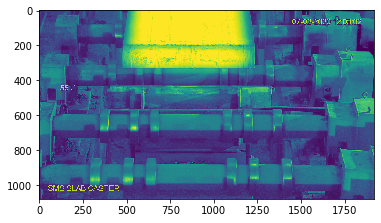

In [57]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#randv = np.dstack((r,v),)
randv = cv2.addWeighted(y, -1.56, r, 2.8, 0.0)
print(randv.shape)

dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
dst = cv2.line(dst,(alar[0],alar[1]),(alar[2],alar[3]),255,13)
#dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)
print(dst.shape,"<- - dst")
plt.imshow(r)

In [58]:
#%matplotlib notebook

In [59]:
leftCor = []
rightCor = []
save = []
while(True):
    ret, img = cap.read()
    
    #img = cv2.resize(img,(img.shape[1] ,img.shape[0] ), cv2.INTER_AREA)
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    randv = cv2.addWeighted(y, .5, b, 1.5, 0.0)  #good 220
    #print(randv.shape)
    
    #randv = cv2.addWeighted(y, -1.56 , r, 2.9, 0.0)
    dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0) # threh 190
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    _,thresh = cv2.threshold(blur,220,255,cv2.THRESH_BINARY )
    
    #img = imutils.auto_canny(thresh)
    
    
    #_,thresh = cv2.threshold(blur,170,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    '''_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)'''
    val = alar[1]
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1] 
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix,",_______________________________")
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]) ,alar[3]),(0,0,255),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2 , (200,255,155), 2 , cv2.LINE_AA)

    
    #img1 = cv2.resize(img ,(int(1920),int(1080)))
    #img2 = cv2.resize(dstCnt,(500,300))
    #img3 = cv2.resize(thresh,(500,300))
    #save.append(img1)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    cv2.imshow('img ',img)
    #cv2.imshow('imgzzz ',dst)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[221 233 243 ... 250 246 243]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 239 ... 252 247 243]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 236 ... 252 247 243]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 236 ... 255 255 254]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 236 ... 255 254 253]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 236 ... 255 254 253]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 236 ... 255 254 253]
2569.6434937611407 ,_______________________________
leftSide =  213 rightSide =  1919
[242 242 236 ... 255 254 253]
2569.6434937611407 ,_______________________________
leftSide =  213 righ

2566.6310160427806 ,_______________________________
leftSide =  215 rightSide =  1919
[224 229 232 ... 253 255 255]
2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[228 235 233 ... 253 255 255]
2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[228 235 233 ... 253 255 255]
2566.6310160427806 ,_______________________________
leftSide =  215 rightSide =  1919
[225 230 232 ... 250 253 255]
2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[225 225 221 ... 250 253 255]
2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[225 228 229 ... 247 251 254]
2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[231 230 228 ... 251 254 255]
2568.1372549019607 ,_______________________________
leftSide =  214 rightSide =  1919
[231 230 228 ... 251 254 255]
2568.1372549019607 ,_______________________________
leftSide =  214 righ

2556.0873440285204 ,_______________________________
leftSide =  222 rightSide =  1919
[223 214 195 ... 249 251 253]
2556.0873440285204 ,_______________________________
leftSide =  222 rightSide =  1919
[223 214 195 ... 235 245 250]
2556.0873440285204 ,_______________________________
leftSide =  222 rightSide =  1919
[223 214 195 ... 235 245 250]
2542.5311942959 ,_______________________________
leftSide =  231 rightSide =  1919
[223 229 232 ... 241 249 253]
2542.5311942959 ,_______________________________
leftSide =  231 rightSide =  1919
[223 229 232 ... 241 249 253]
2557.5935828877004 ,_______________________________
leftSide =  221 rightSide =  1919
[225 228 223 ... 232 243 248]
2557.5935828877004 ,_______________________________
leftSide =  221 rightSide =  1919
[225 228 223 ... 232 243 248]
2557.5935828877004 ,_______________________________
leftSide =  221 rightSide =  1919
[222 224 222 ... 235 242 247]
2557.5935828877004 ,_______________________________
leftSide =  221 rightSide 

2351.2388591800354 ,_______________________________
leftSide =  358 rightSide =  1919
[225 235 238 ... 228 240 247]
2351.2388591800354 ,_______________________________
leftSide =  358 rightSide =  1919
[225 235 238 ... 220 235 247]
2530.48128342246 ,_______________________________
leftSide =  239 rightSide =  1919
[222 230 232 ... 219 231 246]
2538.01247771836 ,_______________________________
leftSide =  234 rightSide =  1919
[225 226 225 ... 236 239 241]
2538.01247771836 ,_______________________________
leftSide =  234 rightSide =  1919
[225 226 225 ... 243 249 251]
2538.01247771836 ,_______________________________
leftSide =  234 rightSide =  1919
[225 226 225 ... 243 249 251]
2539.51871657754 ,_______________________________
leftSide =  233 rightSide =  1919
[225 226 225 ... 243 249 251]
2539.51871657754 ,_______________________________
leftSide =  233 rightSide =  1919
[225 226 225 ... 239 243 245]
2539.51871657754 ,_______________________________
leftSide =  233 rightSide =  1919


2290.9893048128342 ,_______________________________
leftSide =  393 rightSide =  1914
[249 255 255 ... 179 196 215]
2340.695187165775 ,_______________________________
leftSide =  360 rightSide =  1914
[228 227 223 ... 166 194 215]
2340.695187165775 ,_______________________________
leftSide =  360 rightSide =  1914
[228 227 223 ... 166 194 215]
2060.5347593582887 ,_______________________________
leftSide =  360 rightSide =  1728
[224 228 227 ...  45 112 202]
2236.7647058823527 ,_______________________________
leftSide =  244 rightSide =  1729
[223 230 212 ... 112 202 244]
2236.7647058823527 ,_______________________________
leftSide =  244 rightSide =  1729
[223 230 212 ...  97 195 244]
2235.2584670231727 ,_______________________________
leftSide =  244 rightSide =  1728
[223 230 212 ...  52 114 202]
2060.5347593582887 ,_______________________________
leftSide =  360 rightSide =  1728
[225 228 224 ...  91 188 241]
2062.0409982174688 ,_______________________________
leftSide =  359 rightS

In [15]:
break

SyntaxError: 'break' outside loop (<ipython-input-15-6aaf1f276005>, line 4)

In [ ]:
cv2.__version__

In [ ]:
import scipy


In [ ]:
scipy.__version__